# Monte Carlo collaborative target tracking  with ICI

P1 [[ 2.5 -1. ]
 [-1.   1.2]]
P2 [[ 0.8 -0.5]
 [-0.5  4. ]]
microseconds taken for the Kalman fusion=  0
P of Kal [[ 0.60071928 -0.26479074]
 [-0.26479074  0.77461171]]
c of Kal [[1.6579457 ]
 [0.65735288]]
microseconds taken for the CI fusion=  1000
P of CI [[ 1.3320359  -0.57206299]
 [-0.57206299  1.41827261]]
c of CI [[1.54220417]
 [0.67359692]]
microseconds taken for the CCE fusion=  998
P of CCE [[ 0.80076541 -0.34216278]
 [-0.34216278  0.81811556]]
c of CCE [[1.51314281]
 [0.67934979]]
microseconds taken for the ICI fusion=  997
P of ICI [[ 0.93379106 -0.40710332]
 [-0.40710332  1.11475706]]
c of ICI [[1.90038405]
 [0.490459  ]]
microseconds taken for the EI 0.1 fusion=  12965
P of EI 0.1 [[ 0.78999974 -0.3447063 ]
 [-0.3447063   0.94888318]]
c of EI 0.1 [[1.98404047]
 [0.43274039]]
microseconds taken for the EI 0.000001 fusion=  223
P of EI 0.000001 [[ 0.78999974 -0.3447063 ]
 [-0.3447063   0.94888318]]
c of EI 0.000001 [[2.03012878]
 [0.41363533]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


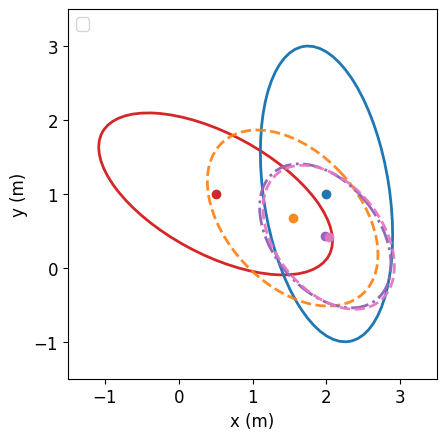

C:\Users\caity\AppData\Local\Temp\ipykernel_10292\3666320253.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


In [1]:
import collaborative_bearing_estimation as cbe
import numpy as np

# %matplotlib notebook
%matplotlib Qt5
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')

from matplotlib.patches import Ellipse
import datetime

## setting up the scenario


In [2]:

seed = np.random.randint(0,200)
# print (seed)


#seed = 112 is not great for CCE vs CI possibly due to no implementation of rejecting inconsistent stuff
# seed= 67 # is a good case 
# seed= 62 # great for CCE but CI performs worse than KF possibly due to no rejection of inconsistent stuff
# seed = 197 # not great for CCE vs CI and almost matching Kalman
# seed = 50
# np.random.seed (seed)
# np.random.seed ()

#initialize figure
x_range_plot = np.array([[-17],[25]])
y_range_plot = np.array([[-25],[20]])









# agent 1 and 2 list of positions with initial position added (same starting position for both)



# agent 1 and 2 list of positions with initial position added (same starting position for both)
x1 = np.array([[-15],[0]])
x2 = np.array([[8],[15]])

# target
x = np.array([[10],[-12]])





s1 = .3 # forward speed
a1 = np.deg2rad(0) #steering angle
# xh1 = np.array([[2],[-1]])

# e1 = 6**2
# P1 = e1 * np.eye(2)
# P1_inv = 1/e1 *np.eye(2)

min_est_r1 = 2 # min est range
max_est_r1 = 70 # max est range
est_ang_e1 = np.deg2rad(12) # est angle error std 

s2 = .3
a2 = np.deg2rad(-90)
# xh2 = xh1 #np.array([[0],[0]])

# e2 = e1 # 100
# P2 = e2 * np.eye(2)
# P2_inv = 1/e2 *np.eye(2)

min_est_r2 = 2 # min est range
max_est_r2 = 70 # max est range
est_ang_e2 = np.deg2rad(10) # est angle error std 

dt = 1
T = 300 # simulation time

F_m = 1 # Frequency of measurements max =1 
F_c = 1 # Frequency of fusion max =1 



# #create multiple agents that estimate the target in two lists of collaborative and non-collaborative
# a_l_NC = []
# a_l_C = []

# a1_NC = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, None)
# a1_CCE = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CCE")
# a1_CI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CI")
# a1_Kalman = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "Kalman")

# a_l_NC.append(a1_NC)
# a_l_C.append(a1_CCE)
# a_l_C.append(a1_CI)
# a_l_C.append(a1_Kalman)

# a2_NC = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, None)
# a2_CCE = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CCE")
# a2_CI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CI")
# a2_Kalman = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "Kalman")

# a_l_NC.append(a2_NC)
# a_l_C.append(a2_CCE)
# a_l_C.append(a2_CI)
# a_l_C.append(a2_Kalman)





## Monte Carlo Run

In [3]:
# Monte Carlo Similation of 100 repeats with only measurement noise changing
MC_e = []
MC_c = []
MC_seed = []

MC_CCE_f = []
MC_CI_f = []
MC_K_f = []
MC_ICI_f = []
MC_EI_f = []

MC_NC_f = []
MC_i = []
MC_ALL_UnRanked = []
MC_n =[]


def identify_and_group():
    MC_Temp_Values = [0] * 5
    i = 0
    while i <= 4:
        err = a_l_C[i].err_l[-1]
        if i == 0:
           lab = "CCE"
        if i == 1:
            lab = "CI"
        if i == 2:
            lab = "Kalman"
        if i == 3:
            lab = "ICI"
        if i == 4:
            lab = "EI"
        MC_Temp_Values[i] = (err , lab)
        i = i+1
    return MC_Temp_Values



T_MC = 1000
for k in range(T_MC):
    
    # generate random seed
#     seed = np.random.randint(0,T_MC)
#     seed = np.random.seed ()
#     MC_seed.append(seed)
#     np.random.seed (seed)
    
    
    s1 = .3 # forward speed
    a1 = np.deg2rad(0) #steering angle
    
    std1 = np.abs(np.random.normal (10, 100))
    x_e = np.random.normal(0, std1, size=(2,1))
    
    xh1 = x + x_e
    
    e1 = std1**2
    P1 = e1 * np.eye(2)
    P1_inv = 1/e1 *np.eye(2)
    
    min_r_e = np.random.normal (2, 5, size=2)
    max_r_e = np.random.normal (80, 20, size=2)
    est_ang_err = np.random.normal (5, 5, size=2)
    
    min_est_r1 = np. maximum (0, min_r_e[0]) # min est range
    max_est_r1 = np. maximum (0, max_r_e[0]) # max est range
    est_ang_e1 = np.deg2rad(np.abs(est_ang_err[0])) # est angle error std 

    s2 = .3
    a2 = np.deg2rad(-90)
    
    
    std2 = np.abs(np.random.normal (10, 100))
    x_e = np.random.normal(0, std2, size=(2,1))
    xh2 = x + x_e  #np.array([[0],[0]])
    
    e2 = std2**2 # 100
    P2 = e2 * np.eye(2)
    P2_inv = 1/e2 *np.eye(2)

    min_est_r2 = np. maximum (0, min_r_e[1]) # min est range
    max_est_r2 = np. maximum (0, max_r_e[1]) # max est range
    est_ang_e2 = np.deg2rad(np.abs(est_ang_err[1])) # est angle error std 

    dt = 1
    T = 150 # simulation time

    F_m = 1 # Frequency of measurements max =1 
    F_c = 1 # Frequency of fusion max =1 
    
    #initialise the agents
    #create multiple agents that estimate the target in two lists of collaborative and non-collaborative
    a_l_NC = []
    a_l_C = []

    a1_NC = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, None)
    a1_CCE = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CCE")
    a1_CI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CI")
    a1_Kalman = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "Kalman")
    a1_ICI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "ICI")
    a1_EI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "EI")
    
    a_l_NC.append(a1_NC)
    a_l_C.append(a1_CCE)
    a_l_C.append(a1_CI)
    a_l_C.append(a1_Kalman)
    a_l_C.append(a1_ICI)
    a_l_C.append(a1_EI)

    a2_NC = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, None)
    a2_CCE = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CCE")
    a2_CI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CI")
    a2_Kalman = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "Kalman")
    a2_ICI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "ICI")
    a2_EI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "EI")
    
    a_l_NC.append(a2_NC)
    a_l_C.append(a2_CCE)
    a_l_C.append(a2_CI)
    a_l_C.append(a2_Kalman)
    a_l_C.append(a2_ICI)
    a_l_C.append(a2_EI)
    
    
    
    
    # generate errors
    e_1 = np.random.normal(0, est_ang_e1, size= int(T/dt)) # agent 1's entire measurement error
    e_2 = np.random.normal(0, est_ang_e2, size= int(T/dt)) 
    
    
    for a in a_l_C + a_l_NC :
        a.est_err(x) # capture the first estimation error
        
    MC_i.append((a_l_NC[0].err_l[-1] +  a_l_NC[1].err_l[-1])/2) # average of initial errors of agents
    
        
    for t in range (int(T/dt)):
                
        for a in a_l_NC + a_l_C:
        
            if a.ID ==1:
                
                cm, Pm, Pm_inv, f = a.sense(x, e_1[t])
            
            else: 
                cm, Pm, Pm_inv, f = a.sense(x, e_2[t])
        
        
            a.estimate(cm, Pm, Pm_inv, f)
            a.est_err(x)
            # a.nees(x)
    
        for a in a_l_C + a_l_NC : # after everyone has sensed then we can allow information exchange and move before the next round
        
            for m in [k for k in a_l_C if k.ID != a.ID and k.fuse_method == a.fuse_method ]: #only looking in collaborative agents with matching method
            
                            
                a.fuse (m)
            
            # a.nees(x) 
    #     print("NEES", a.nees(x)) 
#             a.move(dt)
    
    e_l =[]
    c_l = []
    n_l = []
    for a in a_l_C:
        e_l.append(a.err_l)
        c_l.append(a.conf_l)
        n_l.append(a.nees_l)
    for a in a_l_NC:
        e_l.append(a.err_l)
        c_l.append(a.conf_l)
        n_l.append(a.nees_l)
    
    MC_e.append(e_l)
    MC_c.append(c_l)
    MC_n.append(n_l)
    
    MC_CCE_f.append(a_l_C[0].c)
    MC_CI_f.append(a_l_C[1].c)
    MC_K_f.append(a_l_C[2].c)
    MC_ICI_f.append(a_l_C[3].c)
    MC_EI_f.append(a_l_C[4].c)
    MC_NC_f.append(a_l_NC[0].c)
    
    MC_ALL_UnRanked.append(identify_and_group())
    print(k)
    
    
    
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range for Agent1
Target out of range

In [4]:
# DATA Prepration for plotting
E = []
E_f = []
N = []
N_f = []
# print (np.shape(MC_e))
# print (len(a_l_C + a_l_NC))
for k in range(len(a_l_C + a_l_NC)):
    e_k = [[MC_e[j][k][i] for j in range(T_MC)] for i in range(int(T/dt)) ]
    E.append(e_k)
    
    # n_k = [[MC_n[j][k][i] for j in range(T_MC)] for i in range(int(T/dt)) ]
    # N.append(n_k)

    e_f = [MC_e[j][k][-1] for j in range(T_MC)]
    E_f.append(e_f)

    # n_f = [MC_n[j][k][-1][-1] for j in range(T_MC)]
    # N_f.append(n_f)

print (np.shape(E))
print (np.shape(E_f))
print (np.shape(N))
print (np.shape(N_f))


Sum = np.sum(MC_i)
alphas =.5 +  MC_i/ Sum
# print ("MC_i", MC_i)
# print (np.shape(MC_CI_f))
MC_CCE_f = np.reshape(MC_CCE_f, (T_MC, 2)) 
MC_CI_f = np.reshape(MC_CI_f, (T_MC, 2)) 
MC_K_f = np.reshape(MC_K_f, (T_MC, 2)) 
MC_ICI_f = np.reshape(MC_ICI_f, (T_MC, 2))
MC_EI_f = np.reshape(MC_EI_f, (T_MC, 2))

MC_NC_f = np.reshape(MC_NC_f, (T_MC, 2)) 
MC_Pair = []
for i in range(9):
    hold = MC_CCE_f[i,:] - MC_CI_f[i,:]
    MC_Pair.append(hold)

print(MC_Pair)
print(E_f)
print(N_f)

(12, 150, 1000)
(12, 1000)
(0,)
(0,)
[array([ 0.71701825, -2.85941073]), array([-0.11348726, -8.71169591]), array([ 3.32682347, -1.59805594]), array([-0.66150422,  3.21679224]), array([ 0.74176494, -0.36622592]), array([ 2.39446139, -1.25534473]), array([ 23.43233268, -11.81642294]), array([ 3.78476681, -1.76872671]), array([ 0.21231349, -3.2302242 ])]
[[3.0479911107891504, 6.300202140655601, 2.9342646233421172, 7.299738332916541, 0.06379897287073198, 3.338396766020357, 9.31822030438614, 1.3883974171012035, 1.418719441607892, 0.0673876851197167, 1.3229841465114995, 2.82623379646702, 0.973202507634661, 2.021047307977892, 2.2368587520479815, 0.8155024674471371, 2.1601715595455433, 1.0644479773751245, 2.368104971410768, 1.3087580063491973, 0.864411026990088, 1.0279449780430032, 1.9077639465320095, 1.7049675747095627, 0.21758256927056058, 2.9893270197807382, 1.0894423447052046, 4.087995218964518, 3.050055141061293, 2.2059618718351213, 0.0347024984105982, 1.340171485149676, 0.10243552492049

In [5]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.title ( "Seeds used")
# ax.plot(MC_seed)

# # print (" SEEDS ", MC_seed )

# fig = plt.figure()
# ax2 = fig.add_subplot(111, aspect='equal')
# ax2.set_xlim(x_range_plot[0,0], x_range_plot[1,0])
# ax2.set_ylim(y_range_plot[0,0], y_range_plot[1,0])
# plt.title("Point Cloud", fontsize=12)
# plt.xlabel("x (m)", fontsize=12)
# plt.ylabel("y (m)", fontsize=12)

# ax2.scatter(x1[0,0], x1[1,0], s = 300, marker=">", alpha=1, c = "r", label= "Agent 1")
# ax2.scatter(x2[0,0], x2[1,0], s = 300, marker="v", alpha=1, c = "b", label= "Agent 2")

# ax2.scatter(MC_CCE_f[:,0], MC_CCE_f[:,1], marker="o", alpha = alphas, c = "b")
# ax2.scatter(MC_CI_f[:,0], MC_CI_f[:,1], marker="o", alpha = alphas, c = "r")
# ax2.scatter(MC_K_f[:,0], MC_K_f[:,1], marker="o", alpha = alphas, c = "g")
# ax2.scatter(MC_ICI_f[:,0], MC_ICI_f[:,1], marker="o", alpha = alphas, c = "c")
# ax2.scatter(MC_NC_f[:,0], MC_NC_f[:,1], marker="o", alpha = alphas, c = "k")


# ax2.scatter(x[0,0], x[1,0], s = 300, marker="*", alpha=1, c = "g", label= "Target")

In [13]:
# sort rankings 
MC_Error_Sorted = []
dtype = [('error', float), ('label', 'S10')]
values = MC_ALL_UnRanked
err_sort = np.array(values, dtype=dtype)  
print(MC_ALL_UnRanked)
MC_Error_Sorted.append(np.sort(err_sort, axis = 1, order='error'))
print(MC_Error_Sorted)
RANKS_CCE = []
RANKS_CI = []
RANKS_Kalman = []
RANKS_ICI = []
RANKS_EI = []
for i in MC_Error_Sorted:
    for j in i:
        rank = 1
        for k in j:
            print(k)
            for l in k:
                if l == b'CCE':
                    RANKS_CCE.append(rank)
                if l == b'CI':
                    RANKS_CI.append(rank)
                if l == b'Kalman':
                    RANKS_Kalman.append(rank)
                if l == b'ICI':
                    RANKS_ICI.append(rank)
                if l == b'EI':
                    RANKS_EI.append(rank)
            rank = rank+1
rankedData = []
rankedData.append(RANKS_CCE)
rankedData.append(RANKS_CI)
rankedData.append(RANKS_Kalman)
rankedData.append(RANKS_ICI)
rankedData.append(RANKS_EI)
# rankedColours = ['b','r','g','c','mediumpurple']
rankedColours = ['royalblue','crimson','forestgreen','darkorange','darkorchid']
# rankedColours = ['tab:blue','tab:red','tab:green','tab:orange','tab:purple']
rankedLabels = ['CCE','CI','Kalman','ICI', 'EI']
print(rankedData)

[[(3.0479911107891504, 'CCE'), (5.945023434905465, 'CI'), (5.147314494623503, 'Kalman'), (5.745228957840379, 'ICI'), (2.8123204614977078, 'EI')], [(6.300202140655601, 'CCE'), (14.7295288091171, 'CI'), (4.297733093528313, 'Kalman'), (14.534657266268729, 'ICI'), (4.198299857811494, 'EI')], [(2.9342646233421172, 'CCE'), (6.589906119722378, 'CI'), (5.198538426397353, 'Kalman'), (6.397060629801844, 'ICI'), (1.8750356188250967, 'EI')], [(7.299738332916541, 'CCE'), (3.9394595628222477, 'CI'), (6.92967788330153, 'Kalman'), (3.7778756356893854, 'ICI'), (1.0406214505210112, 'EI')], [(0.06379897287073198, 'CCE'), (0.7774957653461612, 'CI'), (2.0858361242113923, 'Kalman'), (0.5653171108290259, 'ICI'), (0.1048883078029202, 'EI')], [(3.338396766020357, 'CCE'), (6.020968421292261, 'CI'), (1.1018628891634001, 'Kalman'), (5.801102479584627, 'ICI'), (1.0491545369544575, 'EI')], [(9.31822030438614, 'CCE'), (16.934031799916816, 'CI'), (1.2384878899140628, 'Kalman'), (16.849627835341387, 'ICI'), (15.787978

In [18]:

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.title ( "Final Estimation Error of agents ")
bins = np.linspace(0, 16, 5)
plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)
labels = []
colors = []
data = []
nees_data = []
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
plt.title ("NEES")

for i in range(10):
    
    if i ==0:
        # continue
        ls = "-"
        # color = 'b'
        color = 'royalblue'
        method = 'CCE'
        agent = 1
    if i ==1:
        ls = "-"
        # color = 'r'
        color = 'crimson'
        method = 'CI'
        agent = 1
    if i ==2:
        # continue
        ls = "-"
        # color = 'g'
        color = 'forestgreen'
        method = 'Kalman'
        agent = 1
    if i==3:
        ls = "-"
        # color = 'c'
        color = 'darkorange'
        method = 'ICI'
        agent = 1
    if i==4:
        ls = "-"
        # color = 'mediumpurple'
        color = 'darkorchid'
        method = 'EI'
        agent = 1
    if i ==5:
        continue
        ls = "--"
        color = 'b'
        method = 'CCE'
        agent = 2
    if i ==6:
        continue
        ls = "--"
        color = 'r'
        method = 'CI'
        agent = 2
    if i ==7:
        continue
        ls = "--"
        color = 'g'
        method = 'Kalman'
        agent = 2
    if i==8:
        continue
        ls = "--"
        color = 'c'
        method = 'ICI'
        agent = 2
    if i==9:
        continue
        ls = "-"
        color = 'k'
        method = 'None'
        agent = 1
    if i ==10:
        continue
        ls = "--"
        color = 'k'
        method = 'None'
        agent = 2
        
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # plt.title ( "Estimation Error of agent {0}-Method {1}".format(agent, method))
    # ax.boxplot(E[i])
    
    
    # ax2.plot(E_f[i], c= color, ls=ls, label = "agent {0}-Method {1}".format(agent, method))
    # ax6.plot(N_f[i], c= color, ls=ls, label = "agent {0}-Method {1}".format(agent, method))
    labels.append("agent {0}-Method {1}".format(agent, method))
    colors.append(color)
  
    # ax2.hist(E_f[i], color= color, alpha =.5, label = "agent {0}-Method {1}".format(agent, method), stacked=True)
    data.append(E_f[i])
    # nees_data.append(N_f[i])
        # , label="Agent_{0}, Method_{1}".format(a.ID, method)
    
    
    
ax2.legend()

ax6.legend()

# fig3 = plt.figure()
# ax3 = fig3.add_subplot(111)
# plt.title ( "Det of Covariance")
# ax3.plot(a.conf_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
# ax3.legend()




fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)
plt.title ( "Historgram of Final Estimation Errors",fontsize=14)
plt.xlabel (r'$\Vert \hat{x}_1(t) - p\Vert$ (m) at simulation step=150.''\n' r' Total no. of bins=60',fontsize=12)
plt.ylabel ("Number of Occurrences",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
bins = np.linspace(0, 16, 60)

ax4.hist(data, bins=bins, color =colors, label = labels)
ax4.legend()

bin_edges = np.arange(0.5, 5.5+1, 1)
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)
plt.title ( "Historgram of Performance Rank",fontsize=14)
plt.xlabel ("Rank of performance (minimal estimation error) per simulation",fontsize=12)
plt.ylabel ("Number of Occurrences",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax5.hist(rankedData, bins=bin_edges, color=rankedColours, label=rankedLabels)
plt.xticks(np.arange(1, 5+1, 1))
ax5.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 